<a href="https://colab.research.google.com/github/TR160qg/Learning_Cirq/blob/main/Cirq_1st.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install cirq==0.6 --quiet

     |████████████████████████████████| 1.2 MB 5.4 MB/s 
     |████████████████████████████████| 1.7 MB 22.6 MB/s 
     |████████████████████████████████| 1.2 MB 45.0 MB/s 
     |████████████████████████████████| 93 kB 1.2 MB/s 
     |████████████████████████████████| 93 kB 1.3 MB/s 
     |████████████████████████████████| 93 kB 1.3 MB/s 
     |████████████████████████████████| 93 kB 1.1 MB/s 
     |████████████████████████████████| 92 kB 1.1 MB/s 
     |████████████████████████████████| 93 kB 1.1 MB/s 
     |████████████████████████████████| 93 kB 1.0 MB/s 
     |████████████████████████████████| 92 kB 968 kB/s 
     |████████████████████████████████| 92 kB 967 kB/s 
     |████████████████████████████████| 92 kB 228 kB/s 
     |████████████████████████████████| 92 kB 162 kB/s 
     |████████████████████████████████| 92 kB 9.6 MB/s 
     |████████████████████████████████| 91 kB 10.1 MB/s 
     |████████████████████████████████| 91 kB 10.3 MB/s 
     |████████████████████████████████| 9

In [ ]:
import cirq 
import numpy as np

import matplotlib.pyplot as plt

print(cirq.google.Bristlecone)

                                             (0, 5)────(0, 6)
                                             │         │
                                             │         │
                                    (1, 4)───(1, 5)────(1, 6)────(1, 7)
                                    │        │         │         │
                                    │        │         │         │
                           (2, 3)───(2, 4)───(2, 5)────(2, 6)────(2, 7)───(2, 8)
                           │        │        │         │         │        │
                           │        │        │         │         │        │
                  (3, 2)───(3, 3)───(3, 4)───(3, 5)────(3, 6)────(3, 7)───(3, 8)───(3, 9)
                  │        │        │        │         │         │        │        │
                  │        │        │        │         │         │        │        │
         (4, 1)───(4, 2)───(4, 3)───(4, 4)───(4, 5)────(4, 6)────(4, 7)───(4, 8)───(4, 9)───(4, 10)
         │        │      

# Creat a circuit

In [ ]:
# here are three qubits
a = cirq.NamedQubit('a')
b = cirq.NamedQubit('b')
c = cirq.NamedQubit('c')

#This is a collection of operations
#Each operation is a gate
ops = [cirq.H(a), cirq.H(b), cirq.CNOT(b,c), cirq.H(b)]

#The circuit is constructed from the collection of operations
circuit = cirq.Circuit(ops)

#let's have a look...
print(circuit)

a: ───H───────────

b: ───H───@───H───
          │
c: ───────X───────


Note for a controlled operation, the notation'@--' is used.

There are many different types of qubits in Cirq that are defined in the cirq.Oid class, e.g. 'cirq.LineQubit'--qubits at a location in a 1D-chain, 'cirq.GridQubit'--qubits at a location in a 2D-grid.

In [ ]:
# Use cirq.unitary to see the matrix correspond to Hadamard gate
cirq.unitary(cirq.H)

array([[ 0.70710678+0.j,  0.70710678+0.j],
       [ 0.70710678+0.j, -0.70710678+0.j]])

**Gate** objects have the ability to be applied 'On' to one or more qubits. There are two ways to do this for gates, either e.g. cirq.H.on(a) or cirq.H(a). 

**Circuit:** from a collection of operations, you can construct a *Circuit* using the class method Circuit(operations):

circuit = cirq.Circuit(ops)

**Diagram** Circuits can be printed as text diagrams, it is very helpful but does not get into the interanl details of how the Circuit is represented.

A circuit is made up of a sequence of Moment objects. And each Moment object is a list of non-overlapping Operations. 
To see the internal structire of a circuit, one can iterate over the Moments in the circuit while printing them out.

In [ ]:
for i, moment in enumerate(circuit):
  print('Moment {}: {}'.format(i, moment))

Moment 0: H(a) and H(b)
Moment 1: CNOT(b, c)
Moment 2: H(b)


One can also print the circuits by [repr](https://docs.python.org/3/library/functions.html#repr), which returns a more detailed expression.

In [ ]:
print(repr(circuit))

cirq.Circuit([
    cirq.Moment(operations=[
        cirq.H.on(cirq.NamedQubit('a')),
        cirq.H.on(cirq.NamedQubit('b')),
    ]),
    cirq.Moment(operations=[
        cirq.CNOT.on(cirq.NamedQubit('b'), cirq.NamedQubit('c')),
    ]),
    cirq.Moment(operations=[
        cirq.H.on(cirq.NamedQubit('b')),
    ]),
])


# Building Circuits
1. circuit(*ops)
2. append
3. insert: InsertStrategy

In [ ]:
print(circuit)

a: ───H───────────

b: ───H───@───H───
          │
c: ───────X───────


In [ ]:
# Create an empty circuit on three qubits 'a', 'b' and 'c'
circuit = cirq.Circuit()

# Insert a CZ at the first(zero) moment
circuit.append([cirq.CZ(a, b)])
# The next free moment on qubits a and b is one (1)
# On qubit c the next free moment is zero
circuit.append([cirq.H(b), cirq.H(b), cirq.H(a), cirq.H(c)])
# We can add a T gate inline to the last Hadamard on moment two
circuit.append(cirq.T.on(c), strategy=cirq.InsertStrategy.INLINE)

print(circuit, '\n')
print(repr(circuit))

a: ───@───H───────
      │
b: ───@───H───H───

c: ───H───────T─── 

cirq.Circuit([
    cirq.Moment(operations=[
        cirq.CZ.on(cirq.NamedQubit('a'), cirq.NamedQubit('b')),
        cirq.H.on(cirq.NamedQubit('c')),
    ]),
    cirq.Moment(operations=[
        cirq.H.on(cirq.NamedQubit('b')),
        cirq.H.on(cirq.NamedQubit('a')),
    ]),
    cirq.Moment(operations=[
        cirq.H.on(cirq.NamedQubit('b')),
        cirq.T.on(cirq.NamedQubit('c')),
    ]),
])


# Gates

Many common gates are implemented in Cirq, including:

In [ ]:
q0, q1, q2 = cirq.LineQubit.range(3)
ops = [
       cirq.X(q0),
       cirq.Y(q1),
       cirq.Z(q2),
       cirq.CZ(q0, q1),
       cirq.CNOT(q1, q2),
       cirq.H(q0),
       cirq.T(q1),
       cirq.S(q2),
       cirq.CCZ(q0, q1, q2),
       cirq.SWAP(q0, q1),
       cirq.CSWAP(q0, q1, q2),
       cirq.CCX(q0, q1, q2),
       cirq.ISWAP(q0, q1),
       cirq.Rx(0.5 * np.pi)(q0),
       cirq.Ry(0.5 * np.pi)(q1),
       cirq.Rz(0.5 * np.pi)(q2),
       #Square root of X
       (cirq.X**0.5)(q0),
]

print(cirq.Circuit(ops))

0: ───X───@───H───────@───×───@───@───iSwap──────Rx(0.5π)───X^0.5───
          │           │   │   │   │   │
1: ───Y───@───@───T───@───×───×───@───iSwap──────Ry(0.5π)───────────
              │       │       │   │
2: ───Z───────X───S───@───────×───X───Rz(0.5π)──────────────────────


! Matrix representations in the computational basis can be obtained by calling **cirq.unitary** on the gate. For example:

In [ ]:
print(cirq.unitary(cirq.CNOT))

[[1.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 1.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 1.+0.j]
 [0.+0.j 0.+0.j 1.+0.j 0.+0.j]]


In [ ]:
print(cirq.unitary(cirq.Rx(0.5*np.pi)))

[[0.70710678+0.j         0.        -0.70710678j]
 [0.        -0.70710678j 0.70710678+0.j        ]]


For the variational algrithms we will need the single qubit rotation gates:
1. cirq.Rx($\theta$)
2. cirq.Ry($\theta$)
3. cirq.Rz($\theta$)

# Simulation of a circuit

The simulate_moment_steps method allows to simulate the circuit Moment by Moment.

At each point, the state can be accessed.

Example: create a circuit that is a series of small cirq.Rx rotations and plot te probability of measuring the state in the |0> state. Note the default initial state is |0>.

Circuit is a bunch of small rotations about Pauli X axis:
a: ───Rx(0.02π)───Rx(0.02π)───Rx(0.02π)───Rx(0.02π)───Rx(0.02π)───Rx(0.02π)───Rx(0.02π)───Rx(0.02π)───Rx(0.02π)───Rx(0.02π)───Rx(0.02π)───Rx(0.02π)───Rx(0.02π)───Rx(0.02π)───Rx(0.02π)───Rx(0.02π)───Rx(0.02π)───Rx(0.02π)───Rx(0.02π)───Rx(0.02π)───Rx(0.02π)───Rx(0.02π)───Rx(0.02π)───Rx(0.02π)───Rx(0.02π)───Rx(0.02π)───Rx(0.02π)───Rx(0.02π)───Rx(0.02π)───Rx(0.02π)───Rx(0.02π)───Rx(0.02π)───Rx(0.02π)───Rx(0.02π)───Rx(0.02π)───Rx(0.02π)───Rx(0.02π)───Rx(0.02π)───Rx(0.02π)───Rx(0.02π)───Rx(0.02π)───Rx(0.02π)───Rx(0.02π)───Rx(0.02π)───Rx(0.02π)───Rx(0.02π)───Rx(0.02π)───Rx(0.02π)───Rx(0.02π)───Rx(0.02π)───Rx(0.02π)───Rx(0.02π)───Rx(0.02π)───Rx(0.02π)───Rx(0.02π)───Rx(0.02π)───Rx(0.02π)───Rx(0.02π)───Rx(0.02π)───Rx(0.02π)───Rx(0.02π)───Rx(0.02π)───Rx(0.02π)───Rx(0.02π)───Rx(0.02π)───Rx(0.02π)───Rx(0.02π)───Rx(0.02π)───Rx(0.02π)───Rx(0.02π)───Rx(0.02π)───Rx(0.02π)───Rx(0.02π)───Rx(0.02π)───Rx(0.02π)───Rx(0.02π)───Rx(0.02π)───Rx(0.02π)───

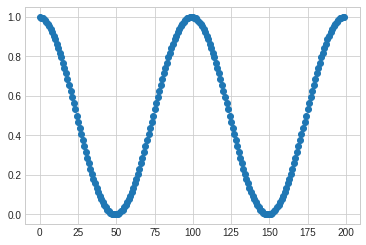

In [ ]:
# A single qubit circuit
a = cirq.NamedQubit('a')

# there are 200 Moments in this circuit. Each is a simulation step.
steps = 200
small_rotations = [cirq.Rx(np.pi / 50.0)(a) for theta in range(steps)]
circuit = cirq.Circuit(small_rotations)

print('Circuit is a bunch of small rotations about Pauli X axis:')
print('{}\n'.format(circuit))

# store indices of steps on the X axis
z = []
# store probabilities on the Y axis
p0 = []

print('We step through the circuit and plot the probability for the |0> states as a function of index of the moment being stepped over.')

simulator = cirq.Simulator()
for i, step in enumerate(simulator.simulate_moment_steps(circuit)):
  # probability is square of amplitude
  prob = np.abs(step.state_vector())**2
  # save the index
  z.append(i)
  # save the probability
  p0.append(prob[0])

# plot a graph
plt.style.use('seaborn-whitegrid')
plt.plot(z, p0, 'o')


Above we have given ourself the direct access to the wave function and calculated the exact probabilities. Suppose we want to sample from the wave function at each point instead.

Circuit is a bunch of small rotations about Pauli X axis:
a: ───Rx(0.02π)───Rx(0.02π)───Rx(0.02π)───Rx(0.02π)───Rx(0.02π)───Rx(0.02π)───Rx(0.02π)───Rx(0.02π)───Rx(0.02π)───Rx(0.02π)───Rx(0.02π)───Rx(0.02π)───Rx(0.02π)───Rx(0.02π)───Rx(0.02π)───Rx(0.02π)───Rx(0.02π)───Rx(0.02π)───Rx(0.02π)───Rx(0.02π)───Rx(0.02π)───Rx(0.02π)───Rx(0.02π)───Rx(0.02π)───Rx(0.02π)───Rx(0.02π)───Rx(0.02π)───Rx(0.02π)───Rx(0.02π)───Rx(0.02π)───Rx(0.02π)───Rx(0.02π)───Rx(0.02π)───Rx(0.02π)───Rx(0.02π)───Rx(0.02π)───Rx(0.02π)───Rx(0.02π)───Rx(0.02π)───Rx(0.02π)───Rx(0.02π)───Rx(0.02π)───Rx(0.02π)───Rx(0.02π)───Rx(0.02π)───Rx(0.02π)───Rx(0.02π)───Rx(0.02π)───Rx(0.02π)───Rx(0.02π)───Rx(0.02π)───Rx(0.02π)───Rx(0.02π)───Rx(0.02π)───Rx(0.02π)───Rx(0.02π)───Rx(0.02π)───Rx(0.02π)───Rx(0.02π)───Rx(0.02π)───Rx(0.02π)───Rx(0.02π)───Rx(0.02π)───Rx(0.02π)───Rx(0.02π)───Rx(0.02π)───Rx(0.02π)───Rx(0.02π)───Rx(0.02π)───Rx(0.02π)───Rx(0.02π)───Rx(0.02π)───Rx(0.02π)───Rx(0.02π)───Rx(0.02π)───Rx(0.02π)───Rx(0.02π)───Rx(0.02π)───

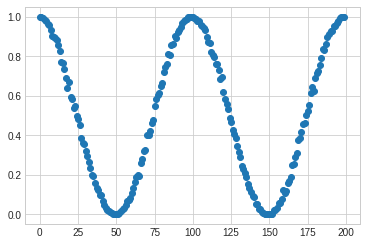

In [ ]:
# A single qubit circuit
a = cirq.NamedQubit('a')

# there are 200 Moments in this circuit. Each is a simulation step.
steps = 200
small_rotations = [cirq.Rx(np.pi / 50.0)(a) for theta in range(steps)]
circuit = cirq.Circuit(small_rotations)

print('Circuit is a bunch of small rotations about Pauli X axis:')
print('{}\n'.format(circuit))

# store indices of steps on the X axis
z = []
# store probabilities on the Y axis
p0 = []

# sampling repetitions
repetitions = 1000

simulator = cirq.Simulator()
for i, step in enumerate(simulator.simulate_moment_steps(circuit)):
  samples = step.sample([a], repetitions=repetitions)
  # 0 is False, 1 is True
  prob = np.sum(samples, axis=0)
  # 1 - (the sum of 1 divided by repetitions)
  prob0 = 1 - (prob[0] / repetitions) 

  # save the index
  z.append(i)
  # save the probability
  p0.append(prob0)

# plot a graph
plt.style.use('seaborn-whitegrid')
plt.plot(z, p0, 'o')

# Gate decompositions
Often the set of gates that one can apply is limited, either by the phyiscal hardware or perhaps by the quantum error correcting code one works with.

Cirq support gate decomposition via the **decompose** protocol

In [ ]:
class HXGate(cirq.SingleQubitGate):
  def _decompose_(self, qubits):
    return cirq.H(*qubits), cirq.X(*qubits)

  def _str_(self):
    return '*HX*'

HX = HXGate()

a = cirq.NamedQubit('a')
circuit = cirq.Circuit([HX(a)])
print('before decomposition: ')
print(circuit)
print(cirq.unitary(circuit))

print()

print('after decomposition: ')
print(cirq.Circuit(cirq.decompose(circuit)))
print(cirq.unitary(cirq.Y**0.5))

before decomposition: 
a: ───<__main__.HXGate object at 0x7efe3cbad210>───
[[ 0.70710678+0.j -0.70710678+0.j]
 [ 0.70710678+0.j  0.70710678+0.j]]

after decomposition: 
a: ───Y^0.5───X───X───
[[ 0.5+0.5j -0.5-0.5j]
 [ 0.5+0.5j  0.5+0.5j]]


The decomposition indicates that the HX gate is equivalent to the Y^0.5 gate, although the matrices differ.
Equivalent gates need to map any input state to output states that can only differ by a global phase, since

<x|$e^{i \phi}$O$e^{-i \phi}$|x> = <x|o|x> for any |x> and any observable O.
This can be tested via

In [ ]:
print(cirq.testing.assert_allclose_up_to_global_phase(cirq.unitary(cirq.Y**0.5), cirq.unitary(circuit), atol=1e-10))

None


Note that upper code not only decomposed the HX gate into H and X but also decomposed H into Y**0.5 and X. In order to decompose only once, one can use cirq.decompose_once:

In [ ]:
print(cirq.Circuit(cirq.decompose_once(HX(a))))

a: ───H───X───


To change this decomposition at run time for the specific hardware or context, define an interceptor function which does aspecific decomposition before falling back to the default.

In [ ]:
def my_decompose(op):
  if isinstance(op, cirq.GateOperation) and isinstance(op.gate, HXGate):
    return cirq.Z(*op.qubits), cirq.H(*op.qubits)

cirq.Circuit(cirq.decompose(HX(a), intercepting_decomposer=my_decompose))

a: ───Z───Y^0.5───X───

Can also define a predicate the says which gates to keep without further decomposition (default predicate is to only keep gates that cannot be decomposed).

In [ ]:
def keep_h_and_x(op):
  return isinstance(op, cirq.GateOperation) and op.gate in [cirq.H, cirq.X]

print(cirq.decompose(HX(a), keep=keep_h_and_x))

[cirq.H.on(cirq.NamedQubit('a')), cirq.X.on(cirq.NamedQubit('a'))]


# Simulation of a circuit

Now try to use Cirq to simulate the circuit

In [ ]:
# This circuit is written like a generator
# Gate are not added to a collection, but returned iteratively using keyword 'yeild'
# compare to the meathod before using 'yeild' allow us to generate operation in-time
# which can save a lot of RAM

def basic_circuit(measure=True):
  # The square root of the Pauli X gate
  sqrt_x = cirq.X**0.5
  # The CZ gate
  cz = cirq.CZ

  yield sqrt_x(a), sqrt_x(b)
  yield cz(a, b)
  yield sqrt_x(a), sqrt_x(b)

  if measure:
    yield cirq.measure(a, b)
    #yield cirq.measure(b, a)

circuit = cirq.Circuit(basic_circuit())
print(circuit) 

a: ───X^0.5───@───X^0.5───M───
              │           │
b: ───X^0.5───@───X^0.5───M───


Python functions that have a **yield** are **generators**. **Generators** are functions that act as iterators, but are much more compact to code.

In [ ]:
for x in basic_circuit():
  print(x)

((cirq.X**0.5).on(cirq.NamedQubit('a')), (cirq.X**0.5).on(cirq.NamedQubit('b')))
CZ(a, b)
((cirq.X**0.5).on(cirq.NamedQubit('a')), (cirq.X**0.5).on(cirq.NamedQubit('b')))
cirq.MeasurementGate(2, 'a,b', ())(a, b)


Each **yields** produces what was yield, here Operations, or list of Operations.

For large circuits, using generators is much more memory efficient than storing the whole circuit.

When you pass this iterator to the append method, the **Circuit** command will flatten all of these and pass them as one giant list to Circuit.append (also works for Circuit.insert).

Thus can define generator for sub-circuits, whcih can vary by size or **Operation** parameters.

In [ ]:
simulator = cirq.Simulator()
circuit = cirq.Circuit(basic_circuit())

# First option: sample from the circuit
result = simulator.run(circuit)

print('Measurement results')
print(result)

Measurement results
a,b=0, 0


Running this multiple times should result in different measurement results, since the above circuit produces a superposition over all computational basis states.

The **run** method on the simulator mimics the actual hardware. It deosn't give access to full wavefunction.

In [ ]:
circuit = cirq.Circuit()
circuit.append(basic_circuit(measure=False))

# Second option: get the wavefunction
result = simulator.simulate(circuit, qubit_order=[a, b]) # use 'simulate' to get the wavefunction

print('Wavefunction: ')
print(np.around(result.final_state, 3))
print('Dirac notation: ')
print(result.dirac_notation())

Wavefunction: 
[0.5+0.j  0. +0.5j 0. +0.5j 0.5+0.j ]
Dirac notation: 
0.5|00⟩ + 0.5j|01⟩ + 0.5j|10⟩ + 0.5|11⟩


In [ ]:
circuit = cirq.Circuit(basic_circuit())

# Specify a number (e.g. 1000) of repetitions
nr_repetitions = 1000
result = simulator.run(circuit, repetitions=nr_repetitions)

# The measurement was on qubit 'a, b'
# See definition of basic_circuit at measurement
# Therefore, key is 'a, b', if the measurement would have been, e.g. 'b, a' then key='b,a'
print(repr(result))
# to see internal structure of TrailResult

# print the histogram using key='a, b'
print(result.histogram(key='a,b'))

cirq.TrialResult(params=cirq.ParamResolver({}), measurements={'a,b': np.array([[1, 1], [1, 1], [0, 0], [0, 0], [0, 1], [0, 1], [1, 0], [0, 0], [1, 0], [0, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 0], [1, 1], [0, 1], [0, 0], [0, 1], [0, 1], [1, 1], [1, 1], [0, 1], [1, 0], [1, 0], [1, 1], [0, 0], [0, 0], [1, 0], [1, 1], [0, 1], [1, 0], [1, 0], [1, 0], [0, 0], [0, 0], [1, 0], [0, 1], [0, 1], [0, 1], [0, 0], [0, 1], [0, 1], [0, 0], [1, 1], [1, 0], [1, 0], [1, 0], [1, 1], [1, 1], [1, 0], [1, 0], [0, 1], [0, 0], [0, 1], [0, 1], [0, 0], [0, 1], [0, 1], [0, 1], [1, 0], [0, 1], [1, 0], [1, 0], [0, 1], [1, 0], [1, 1], [0, 1], [1, 1], [1, 1], [0, 1], [0, 1], [1, 1], [0, 1], [0, 1], [0, 1], [0, 0], [1, 1], [0, 1], [1, 0], [1, 0], [1, 1], [0, 1], [1, 1], [1, 1], [1, 0], [0, 0], [1, 0], [0, 0], [1, 0], [1, 1], [1, 0], [1, 0], [1, 0], [1, 1], [1, 1], [1, 1], [1, 0], [1, 0], [1, 0], [0, 1], [1, 1], [1, 0], [1, 1], [1, 0], [0, 0], [1, 1], [0, 1], [1, 0], [0, 0], [1, 0], [0, 0], [0, 0], [0, 0], [0, 1], [

In [ ]:
def count_results(e):
  if e[0] == e[1]:
    return 'agree'
  else:
    return 'disagree'

# The same output like from the previous print statement
print(result.histogram(key='a,b', fold_func=count_results))


Counter({'disagree': 519, 'agree': 481})


# Parameterized Circuits
Cirq also supports parameterized gates with symbolic values via **sympy**.